Folllowing and understaning someone's solution!

In [3]:
import numpy as np # Linear Algebra
import pandas as pd # Data Processing, CSV file I/O
import os # Interacting with OP(Operating System)
for dirname, _, filenames in os.walk('input'): # os.walk() is a func for generating the file names in a directory tree by walking the tree top-down or bottom-up
# dirname is the path to the current directory being walked
# _ is a list of names of subdirectories in dirname. we are ignoring the subdirectory list here
# filenames a list of the names of the non-directory files in dirname   
    for filename in filenames:
        print(os.path.join(dirname, filenames))
# os.path.join() is usef for constracting a full path by joining path components. 
# it handles differences in path seperators automatically

In [4]:
data_path = '../data/input/demand-forecasting-kernels-only/'

train = pd.read_csv(os.path.join(data_path, 'train.csv'))
test = pd.read_csv(os.path.join(data_path, 'test.csv'))
submission = pd.read_csv(os.path.join(data_path, 'sample_submission.csv'))

In [5]:
import logging
# using this module for recoding events that happens during software run.
logger = logging.getLogger('cmdstan')
# cmdstan for using a custom-built solution for the data problem
logger.setLevel(logging.DEBUG)

In [6]:
train_df = pd.read_csv("../data/input/demand-forecasting-kernels-only/train.csv")
X_test = pd.read_csv("../data/input/demand-forecasting-kernels-only/test.csv", index_col="id").reset_index(drop=True)

In [7]:
print("Train set size: ", train_df.shape)
train_df.head()

Train set size:  (913000, 4)


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [8]:
print("Test set size: ", X_test.shape)
X_test.head()

Test set size:  (45000, 3)


,date,store,item
0,2018-01-01,1,1
1,2018-01-02,1,1
2,2018-01-03,1,1
3,2018-01-04,1,1
4,2018-01-05,1,1


In [9]:
print(train_df.info())
print("\n")
print(X_test.info())

# there are no missing value in any of the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    45000 non-null  object
 1   store   45000 non-null  int64 
 2   item    45000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB
None


In [10]:
train_df.drop_duplicates(inplace=True)
print(train_df.shape)

# there are no duplicated rows casue the number of rows didn't change

(913000, 4)


In [11]:
# because date was object we need to change it to a date regular format.
train_df["date"] = pd.to_datetime(train_df["date"])
X_test["date"] = pd.to_datetime(X_test["date"])

In [12]:
n_stores = train_df["store"].nunique()
n_items = train_df["item"].nunique()
# Finding unique numbers in the series

In [13]:
train_sets = {}
test_sets = {}

# Segmenting the data

for store in range(1, n_stores + 1):
    for item in range(1, n_items + 1):
        train_sets[(store, item)] = train_df[["date", "sales"]][(train_df["store"] == store) & (train_df["item"] == item)].copy()
        train_sets[(store, item)].rename(columns={"date": "ds", "sales": "y"}, inplace=True)
        
        test_sets[(store, item)] = X_test[["date"]][(X_test["store"] == store) & (X_test["item"] == item)].copy()
        test_sets[(store, item)].rename(columns={"date": "ds"}, inplace=True)

In [14]:
import random # A module which provised funcs for generating pseudo-random numbers
import matplotlib.pyplot as plt
import seaborn as submission
%matplotlib inline
#Jupyter magic command, which displays plots generated by Matplotlib directly within the output cells of the notebook

In [15]:
key_sample = random.sample(list(train_sets.keys()), 4)
# Getting four random (store, item) list to see the problem faster

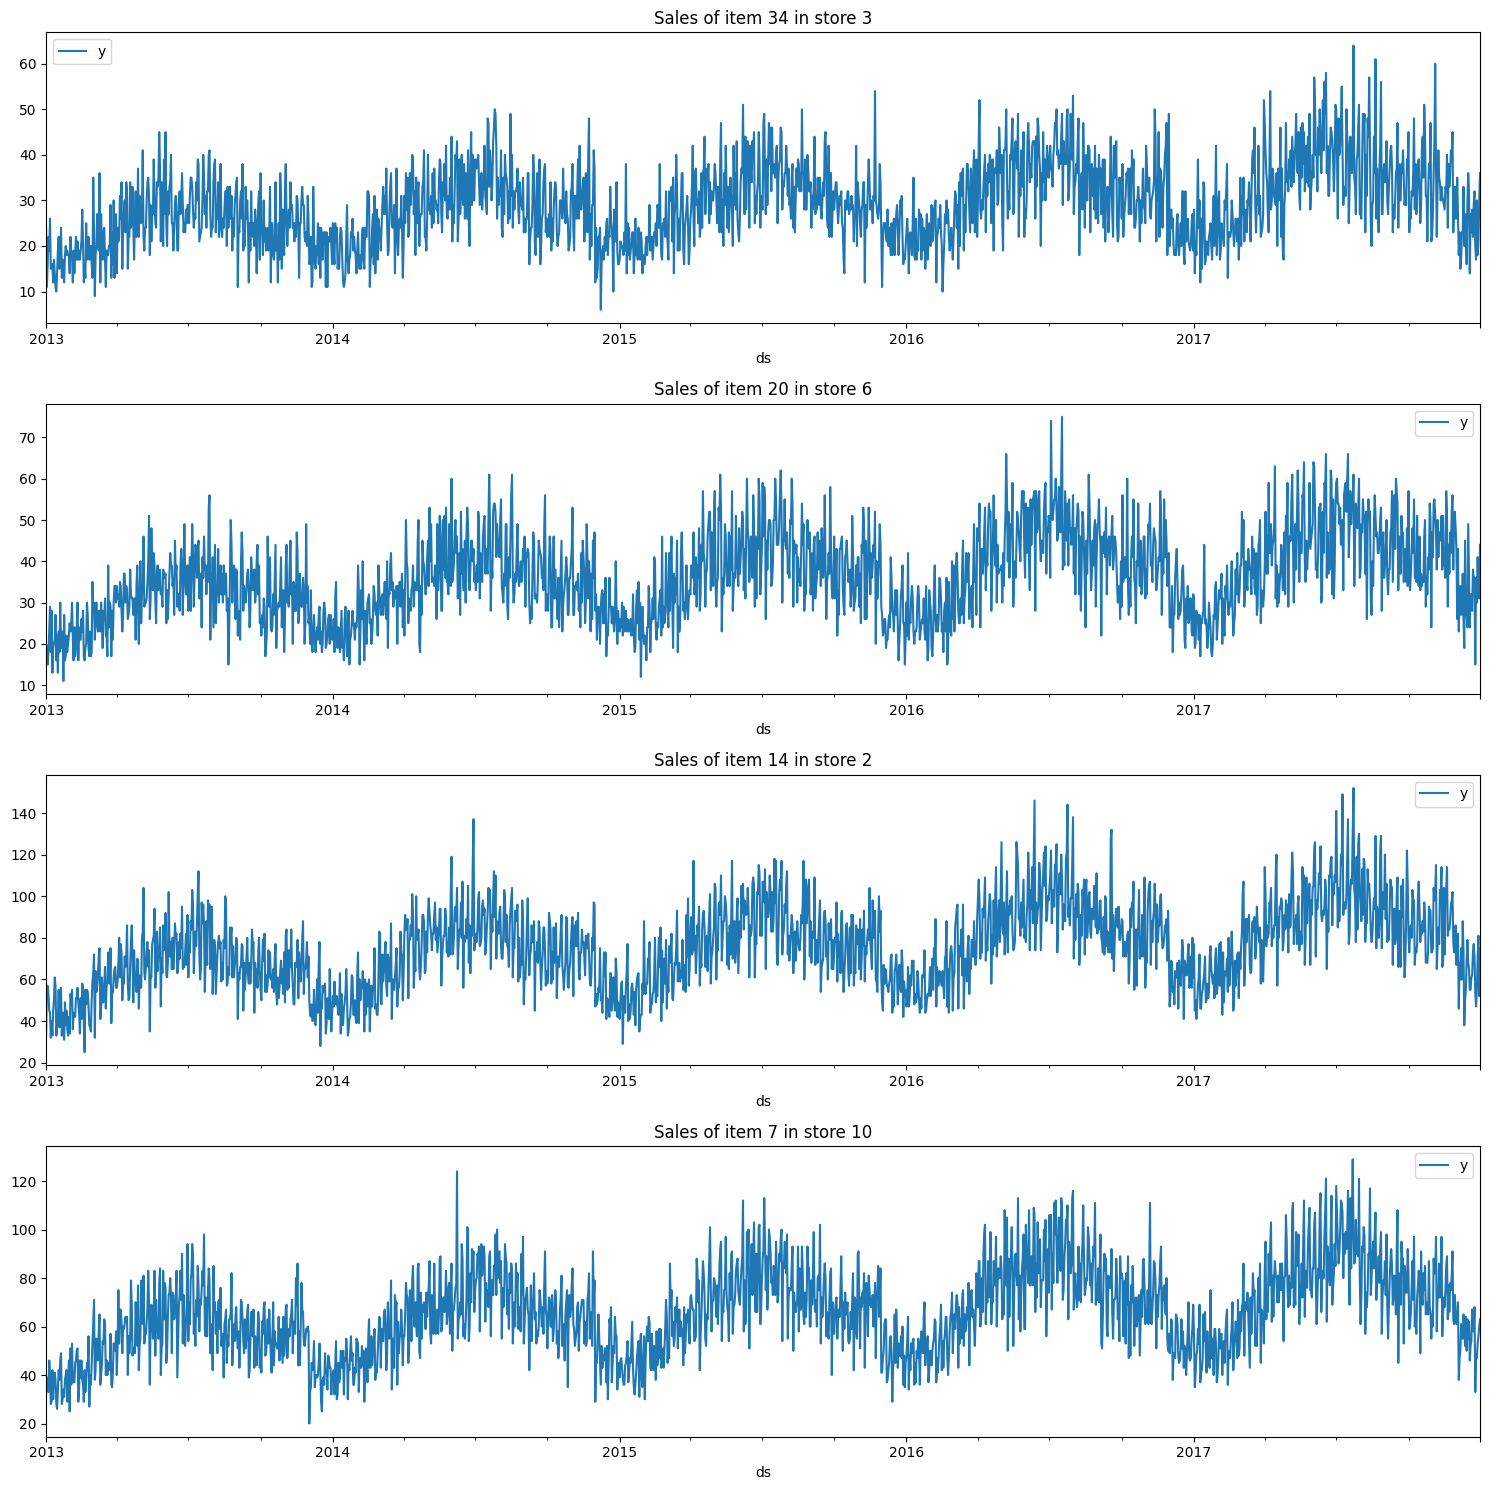

In [16]:
fig, axes = plt.subplots(4, 1, figsize = (15, 15))

for ax, key in zip(axes.flatten(), key_sample):
    store, item = key
    train_sets[key].set_index('ds').plot(ax=ax, title = f"Sales of item {item} in store {store}")

plt.tight_layout()
plt.savefig("../data/output/random_sales_items.png")
plt.show()

# They folow a very similar distributions

In [17]:
from prophet import Prophet

# Because it's a good library when it comes to forcating time_series.

Importing plotly failed. Interactive plots will not work.


In [18]:
# one model for each of the products: total 500.

models = {}
for key in train_sets.keys():
    models[key] = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
    models[key].fit(train_sets[key])

16:20:04 - cmdstanpy - INFO - Chain [1] start processing
16:20:04 - cmdstanpy - INFO - Chain [1] done processing
16:20:04 - cmdstanpy - INFO - Chain [1] start processing
16:20:05 - cmdstanpy - INFO - Chain [1] done processing
16:20:05 - cmdstanpy - INFO - Chain [1] start processing
16:20:05 - cmdstanpy - INFO - Chain [1] done processing
16:20:05 - cmdstanpy - INFO - Chain [1] start processing
16:20:05 - cmdstanpy - INFO - Chain [1] done processing
16:20:06 - cmdstanpy - INFO - Chain [1] start processing
16:20:06 - cmdstanpy - INFO - Chain [1] done processing
16:20:06 - cmdstanpy - INFO - Chain [1] start processing
16:20:06 - cmdstanpy - INFO - Chain [1] done processing
16:20:07 - cmdstanpy - INFO - Chain [1] start processing
16:20:07 - cmdstanpy - INFO - Chain [1] done processing
16:20:07 - cmdstanpy - INFO - Chain [1] start processing
16:20:07 - cmdstanpy - INFO - Chain [1] done processing
16:20:07 - cmdstanpy - INFO - Chain [1] start processing
16:20:08 - cmdstanpy - INFO - Chain [1]

In [19]:
separate_forecaste = {}

for (store, item), model in models.items():
    future_df = test_sets[(store, item)]

    prediction = model.predict(future_df[["ds"]])

    forecast = prediction[["ds", "yhat"]].copy()
    forecast["store"] = store
    forecast["item"] = item
    separate_forecaste[(store, item)] = forecast

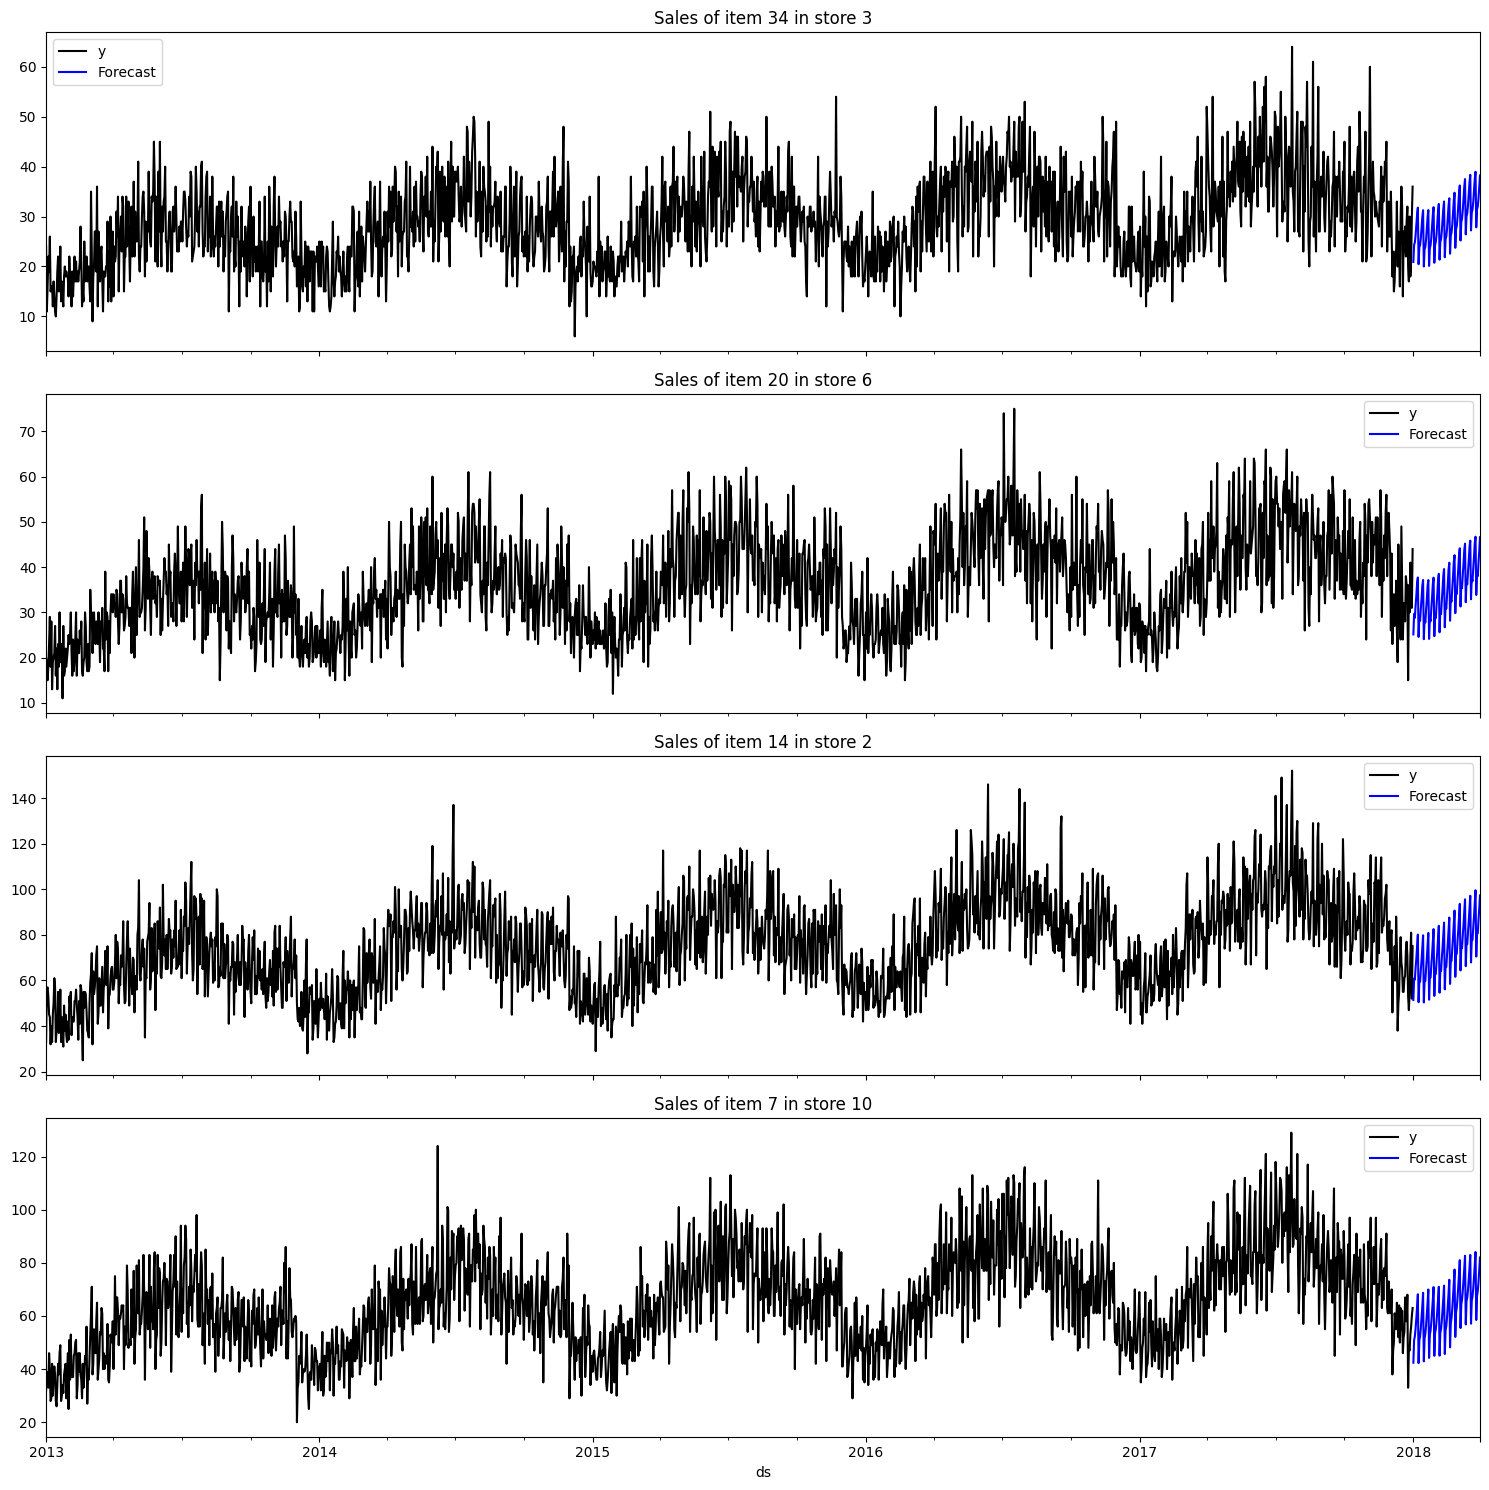

In [20]:
fig, axes = plt.subplots(4, 1, figsize = (15, 15), sharex = True)

for ax, key in zip(axes.flatten(), key_sample):
    store, item = key

    historical_data = train_sets[key]
    forecast_data = models[key].predict(test_sets[key])

    historical_data.plot(kind='line', x='ds', color='black', ax=ax, label='Historical Data')

    forecast_data.plot(kind='line', x='ds', y='yhat', color='blue', ax=ax, label='Forecast')

    ax.set_title(f"Sales of item {item} in store {store}")
    ax.legend()

plt.tight_layout()
plt.savefig("../data/output/random_sales_items_predict.png")
plt.show()

In [21]:
forecasts = pd.concat(list(separate_forecaste.values())).rename(columns={"ds": "date", "yhat": "sales"})

In [22]:
final_forecasts = pd.merge(X_test, forecasts, how="left")
final_forecasts["id"] = final_forecasts.index  

final_forecasts

,date,store,item,sales,id
0,2018-01-01,1,1,12.982697,0
1,2018-01-02,1,1,15.638430,1
2,2018-01-03,1,1,16.281675,2
3,2018-01-04,1,1,16.942757,3
4,2018-01-05,1,1,18.492186,4
...,...,...,...,...,...
44995,2018-03-27,10,50,75.358286,44995
44996,2018-03-28,10,50,76.693515,44996
44997,2018-03-29,10,50,81.736205,44997
44998,2018-03-30,10,50,86.857864,44998


In [23]:
sample_submission = pd.read_csv("../data/input/demand-forecasting-kernels-only/sample_submission.csv")
sample_submission

,id,sales
0,0,52
1,1,52
2,2,52
3,3,52
4,4,52
...,...,...
44995,44995,52
44996,44996,52
44997,44997,52
44998,44998,52


In [24]:
submission = final_forecasts[["id", "sales"]].to_csv("submission.csv", index=False)

* My take aways form this project:

The notebook implements a clean, fully end-to-end Prophet-based demand-forecasting pipeline.  Data are ingested, cleaned, split by (store, item), 50 individual Prophet models are trained and then stitched back together to produce the competition submission.  Everything runs, the plots look reasonable, and the code is short and easy to read.

I guess we could use joblib.Parallel or ThreadPoolExecuter to parallelise the loop besidees using Prophet.
My personal to go model after this one i guess will be LightGBM cause it pass on the GPU.
I would like to work on more Feature engineering and considering promotions, holidays,...

It was really well writen and absolutely loved it and learn alot.


In [25]:
from prophet.diagnostics import cross_validation, performance_metrics


df_cv = cross_validation(
    models[key_sample[0]],
    initial='730 days', 
    period='180 days',  
    horizon='365 days' 
)

df_p = performance_metrics(df_cv)
print(df_p.head())

  0%|          | 0/5 [00:00<?, ?it/s]

16:24:04 - cmdstanpy - INFO - Chain [1] start processing
16:24:04 - cmdstanpy - INFO - Chain [1] done processing
16:24:05 - cmdstanpy - INFO - Chain [1] start processing
16:24:05 - cmdstanpy - INFO - Chain [1] done processing
16:24:05 - cmdstanpy - INFO - Chain [1] start processing
16:24:05 - cmdstanpy - INFO - Chain [1] done processing
16:24:06 - cmdstanpy - INFO - Chain [1] start processing
16:24:06 - cmdstanpy - INFO - Chain [1] done processing
16:24:06 - cmdstanpy - INFO - Chain [1] start processing
16:24:06 - cmdstanpy - INFO - Chain [1] done processing


  horizon        mse      rmse       mae      mape     mdape     smape  \
0 37 days  25.509579  5.050701  4.025187  0.166497  0.116431  0.153083   
1 38 days  25.902251  5.089425  4.027658  0.165172  0.116431  0.152462   
2 39 days  26.356723  5.133880  4.071045  0.166618  0.120110  0.153642   
3 40 days  26.033189  5.102273  4.047463  0.165427  0.120110  0.152578   
4 41 days  26.676281  5.164909  4.069739  0.170679  0.123004  0.155152   

   coverage  
0  0.818681  
1  0.816484  
2  0.807692  
3  0.812088  
4  0.807692  
